In [8]:
# Import Pandas
import pandas as pd

#Set max column display to 100
pd.set_option('display.max_columns', 100)
import requests

In [9]:
# Create DataFrame from Data Ingestion Notebook CSV
df_eda = pd.read_csv('NYC-311-Service-Requests.csv')

# Top 10 Complaint Types (Types Outside of the Top 10 Are Grouped Into "Other")

Text(0, 0.5, 'Service Requests')

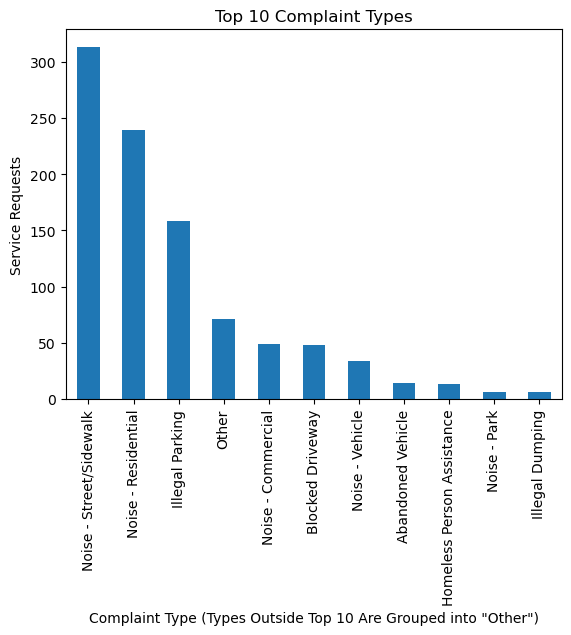

In [59]:
# Group by Complaint_Type, sum by service requests (count)
complaint_counts = df_eda.groupby('Complaint_Type')['count'].sum().sort_values(ascending=False)

# Head for top 10 Complaint_Types
top_types = complaint_counts.head(10).index

# Create a new column for grouped Complaint_Types otuside of the top 10
df_eda['Complaint_Grouped'] = df_eda['Complaint_Type'].apply(lambda x: x if x in top_types else 'Other')

# Group again and plot
final_plot = df_eda.groupby('Complaint_Grouped')['count'].sum().sort_values(ascending=False) \
    .plot(kind='bar', title='Top 10 Complaint Types')

final_plot.set_xlabel('Complaint Type (Types Outside Top 10 Are Grouped into "Other")') 
final_plot.set_ylabel('Service Requests')  

# Service Requests Per Borough

Text(0, 0.5, 'Service Requests')

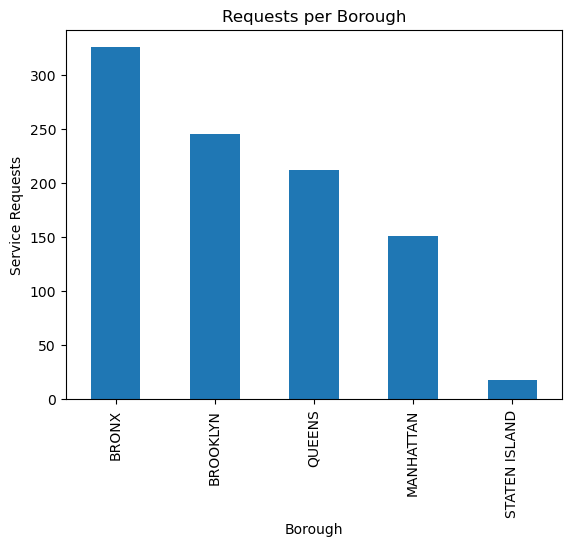

In [65]:
# Group by Borough, sum requests (count)
final_plot = df_eda.groupby('Borough')['count'].sum().sort_values(ascending=False) \
    .plot(kind='bar', title='Requests per Borough')

final_plot.set_xlabel('Borough')  
final_plot.set_ylabel('Service Requests')  

# Borough Population vs. Amount of Service Requests

Text(0, 0.5, 'Service Requests')

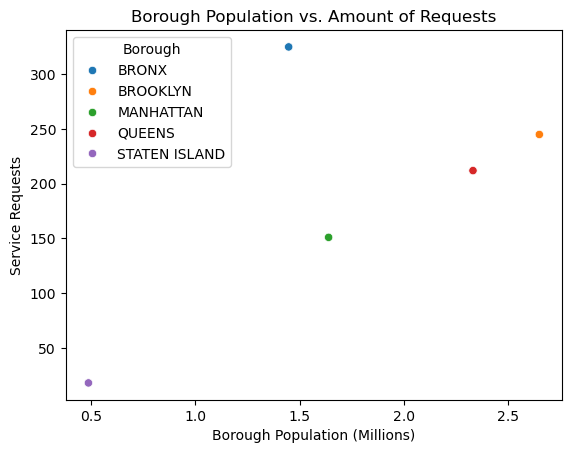

In [63]:
# Import for scatterplot visuals
import matplotlib.pylab as plt
import seaborn as sns

# Manually input Borough Population, pulled from NYC Open Data site
Borough_2020s_Population = {'BRONX': 1446788/1000000,
    'BROOKLYN': 2648452/1000000,
    'MANHATTAN': 1638281/1000000,
    'QUEENS': 2330295/1000000,
    'STATEN ISLAND': 487155/1000000}

# Map Borough_2020s_Population to df_eda
df_eda['Borough_2020s_Population'] = df_eda['Borough'].map(Borough_2020s_Population)

# Group By Borough, Borough_2020s_Population, sum by requests (count)
Borough_Requests_vs_Population = df_eda.groupby(['Borough', 'Borough_2020s_Population'])['count'].sum().reset_index()

# Plot
final_plot = sns.scatterplot(
    data = Borough_Requests_vs_Population,
                      x='Borough_2020s_Population',
                      y='count', 
                      hue = 'Borough')
final_plot.set_title('Borough Population vs. Amount of Requests')
final_plot.set_xlabel('Borough Population (Millions)')
final_plot.set_ylabel('Service Requests')
